In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2025-01-21 11:52:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.207, 172.217.218.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  28.6MB/s    in 2.3s    

2025-01-21 11:52:55 (28.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/tmp/cats_and_dogs_filtered"

train  validation  vectorize.py


In [ ]:
!cp -av "/tmp/cats_and_dogs_filtered" "/content/drive/My Drive/Colab Notebooks"

'/tmp/cats_and_dogs_filtered' -> '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_filtered'
'/tmp/cats_and_dogs_filtered/vectorize.py' -> '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_filtered/vectorize.py'
'/tmp/cats_and_dogs_filtered/validation' -> '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_filtered/validation'
'/tmp/cats_and_dogs_filtered/validation/dogs' -> '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_filtered/validation/dogs'
'/tmp/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg' -> '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg'
'/tmp/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg' -> '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg'
'/tmp/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg' -> '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg'
'/tmp/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg' -

In [ ]:
base_dir = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0

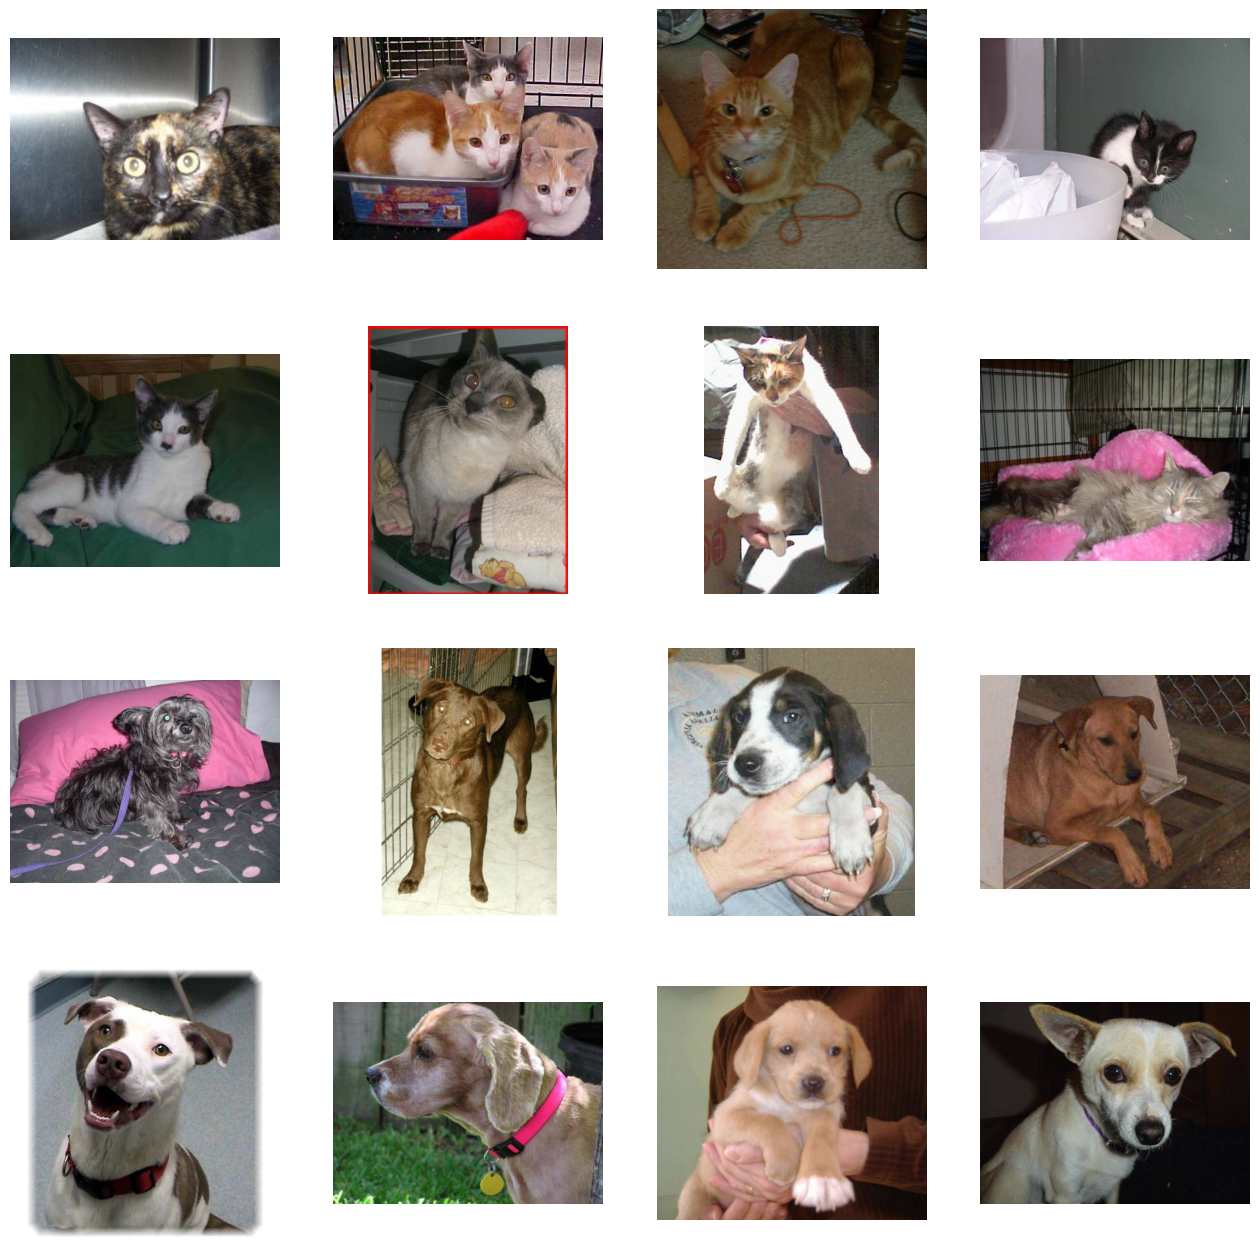

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

In [ ]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    batch_size=100,
    validation_data=validation_generator
)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - acc: 0.9931 - loss: 0.0190 - val_acc: 0.7300 - val_loss: 1.8452
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - acc: 0.9762 - loss: 0.1008 - val_acc: 0.7160 - val_loss: 1.4870
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - acc: 0.9984 - loss: 0.0074 - val_acc: 0.7100 - val_loss: 1.6479
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - acc: 0.9998 - loss: 0.0014 - val_acc: 0.7090 - val_loss: 1.7255
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - acc: 0.9932 - loss: 0.0194 - val_acc: 0.7280 - val_loss: 1.7581
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 143ms/step - acc: 0.9828 - loss: 0.0828 - val_acc: 0.7130 - val_loss: 1.7703
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - acc: 0.9897 - loss: 0.0769 - val_acc: 0.7200 - val_loss: 1.8203
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - acc: 0.9999 - loss: 8.1466e-04 - val_acc: 0.5580 - val_loss: 7.6907
Epoch 9/15
100/100 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


<ipython-input-107-7f3a93e07b05>:44: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-107-7f3a93e07b05>:47: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


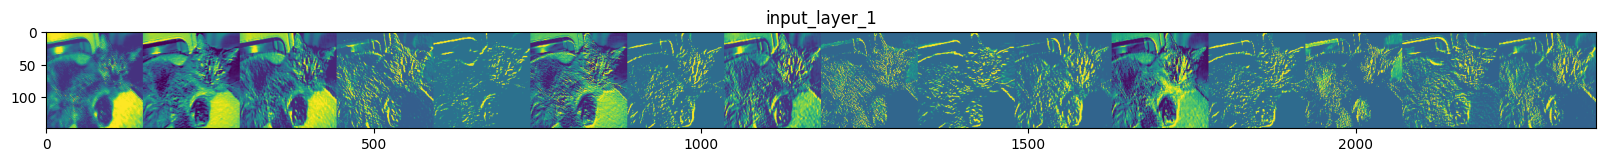

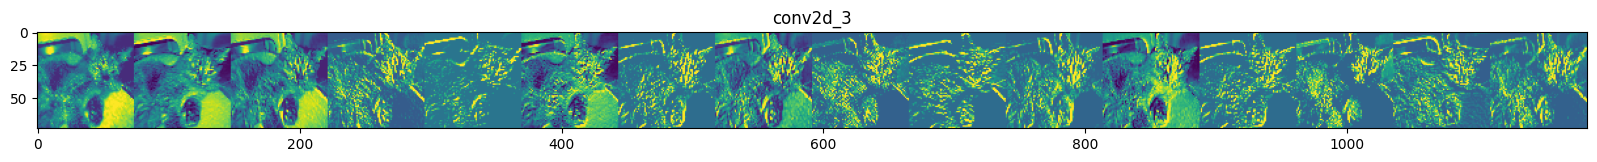

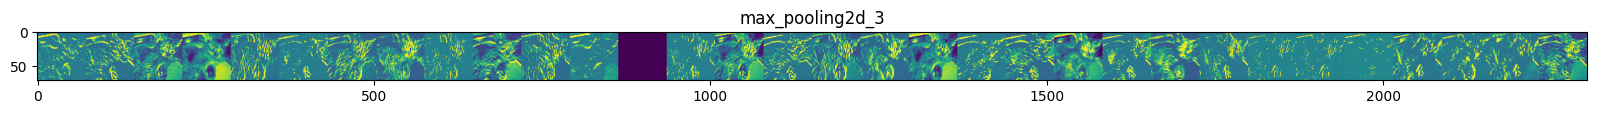

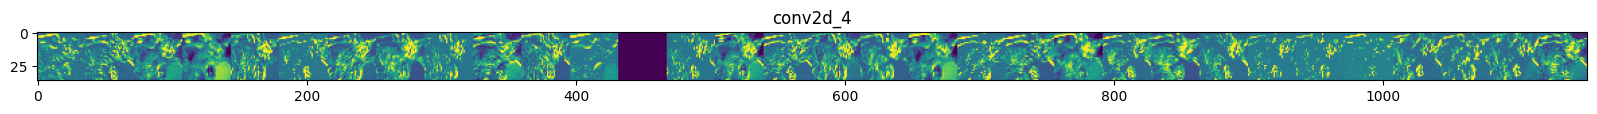

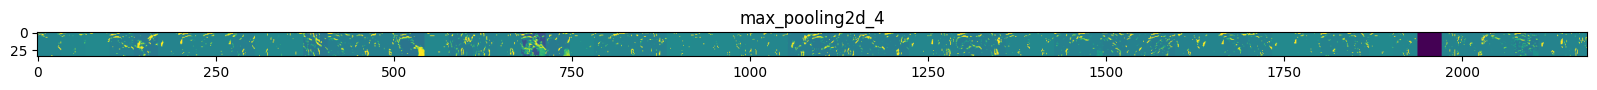

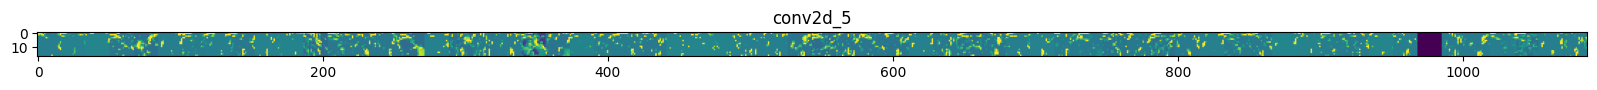

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import Model

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

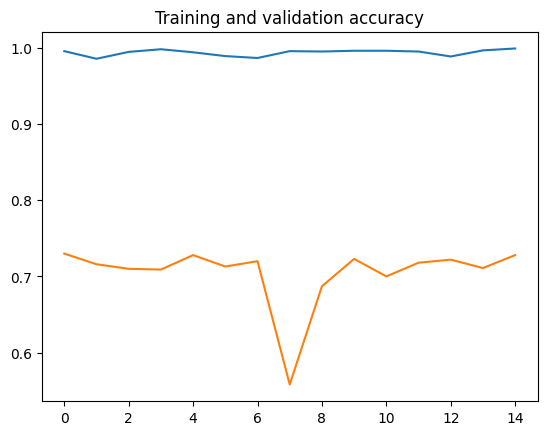

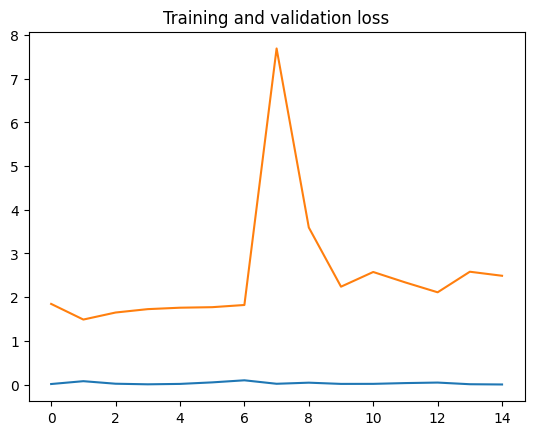

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
model.save('catsanddogs_predict.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('catsanddogs_predict.h5')  # Ganti 'nama_model.h5' dengan nama file model Anda yang sebenarnya

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Replace 'path/ke/gambar/baru.jpg' with the actual path to your image file
img_path = '/content/drive/MyDrive/cats.jpg'  # Example path, adjust accordingly

img = load_img(img_path, target_size=(150, 150))  # Ubah ukuran gambar agar sesuai dengan input model
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # Tambahkan dimensi batch
x /= 255.0  # Skala nilai piksel ke rentang [0, 1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [ ]:
threshold = 1
if prediction[0][0] > threshold:
    print('Prediksi: Anjing')
else:
    print('Prediksi: kucing')

Prediksi: kucing
